<a href="https://colab.research.google.com/github/IliaLapushanskyy/IliaLapushanskyy/blob/main/Diabet_skleanr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


In [ ]:
# Load data

from sklearn.datasets import load_diabetes
data = load_diabetes()


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### 1.2 Описание исходных данных


In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Датасет load_diabetes является стандартным набором данных в библиотеке scikit-learn. Этот набор данных содержит информацию о пациентах с диабетом и используется для предсказания количественного показателя прогрессирования болезни через год после измерений.

Датасет включает 10 признаков:

1. age - возраст пациента (целочисленный)
2. sex - пол пациента (категориальный)
3. bmi - индекс массы тела (вещественный)
4. bp - среднее артериальное давление (вещественный)
5. s1 - уровень холестерина в крови (целочисленный)
6. s2 - уровень сахара в крови (вещественный)
7. s3 - показатель инсулина (вещественный)
8. s4 - показатель массы печени (вещественный)
9. s5 - уровень сывороточного уровня (вещественный)
10. s6 - уровень сахара после еды (целочисленный )

Объём выборки составляет - 442.

Входными переменными выступают 10 признаков, описанных выше. Выходными - признак, который представляет собой количественный показатель прогрессирования диабета через год после прошлого измерения.

Таким образом, задача заключается в предсказании значения переменной на основе 10 входных признаков, из чего задача сводится к регресионной.

Приведем данные в нормированном и ненормированном состоянии


In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
data_2 = load_diabetes(scaled = False)

df_2 = pd.DataFrame(data_2.data, columns=data_2.feature_names)

df_2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


Для упрощения построения модели машинного обучения в задаче мы в дальнейшем будем использовать стандартизированный датасет.

Перед началом анализа добавим в ДатаФрейм регресивный признак

In [ ]:
df

df['target'] = data.target

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### 1.3 Выборочные характеристики

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### 1.4 Исследование распределений признаков и откликов


Выведем гистограммы распределения для каждого признака

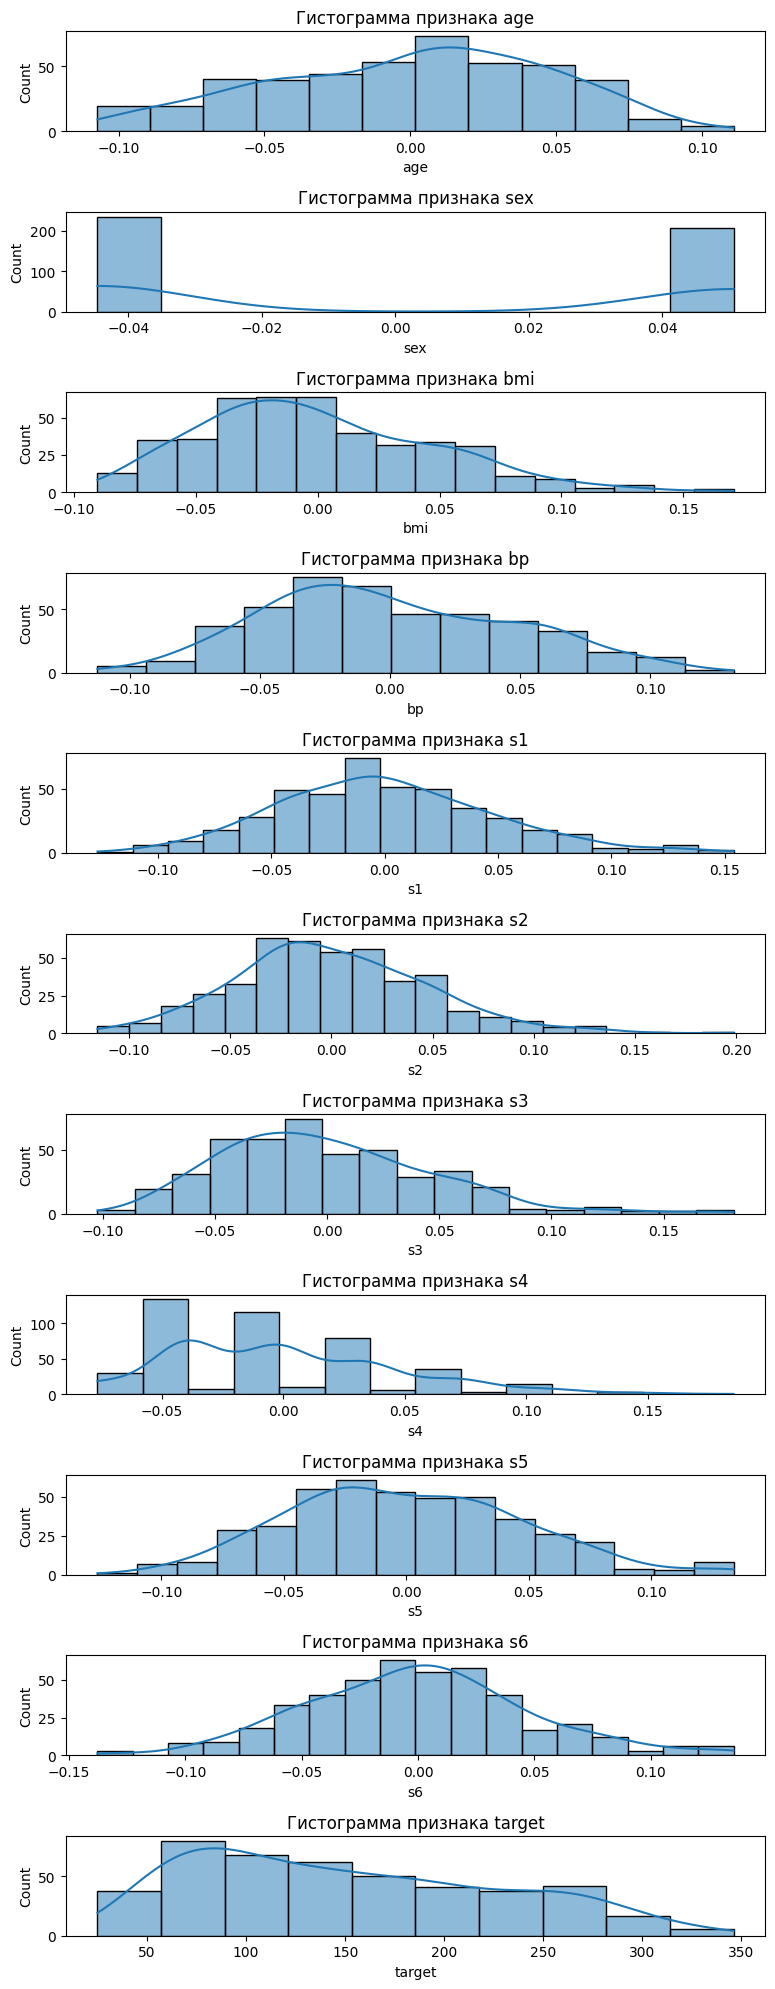

In [ ]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.columns, 1):
  plt.subplot(11, 2, 2 * i - 1)
  sns.histplot(df[column], kde=True)
  plt.title(f'Гистограмма признака {column}')
plt.tight_layout()
plt.show()

Большинство признаков имеют распределение, близкое к нормальному, что соответствует их нормированному виду.

Теперь рассмотрим Box-and-Whisker диаграммы для каждого признака

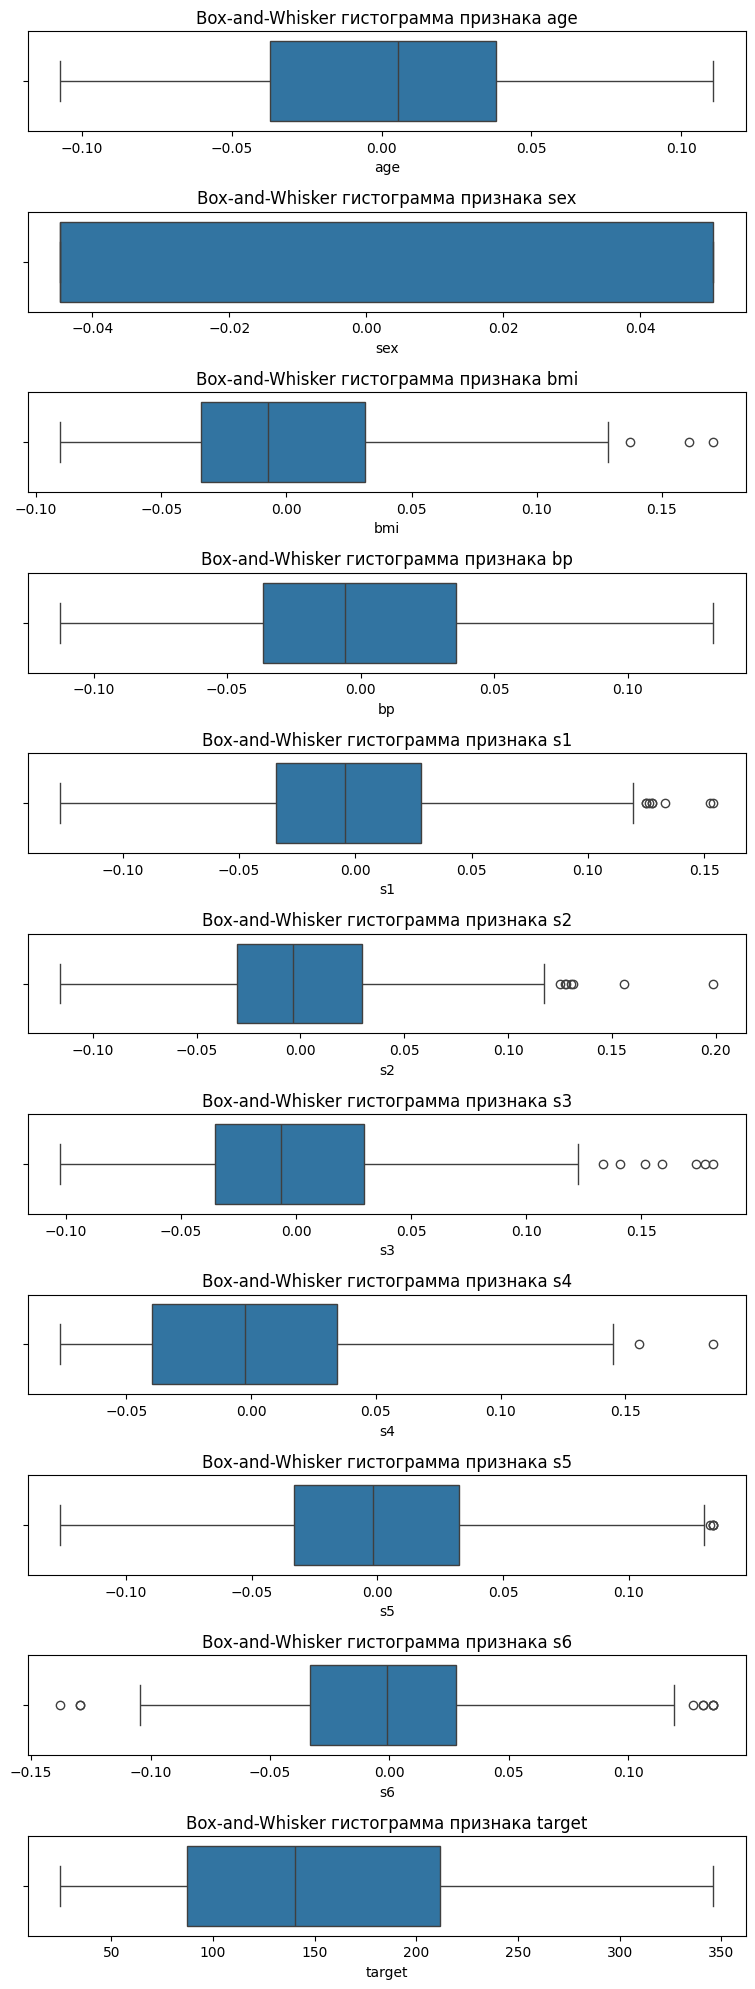

In [ ]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(df.columns, 1):
  plt.subplot(11, 2, 2 * i - 1)
  sns.boxplot(x=df[column])
  plt.title(f'Box-and-Whisker гистограмма признака {column}')
plt.tight_layout()
plt.show()

Некоторые признаки, такие как s1 и s2, могут иметь выбросы, что видно по отдельным точкам за пределами "усов" на диаграммах, однако большинство признаков имеют умеренные или незначительные выбросы, что свидетельствует о том, что данные достаточно чистые.

### 1.5 Корреляционный анализ данных


Визуализируем диаграммы рассеяния между всеми комбинациями признаков

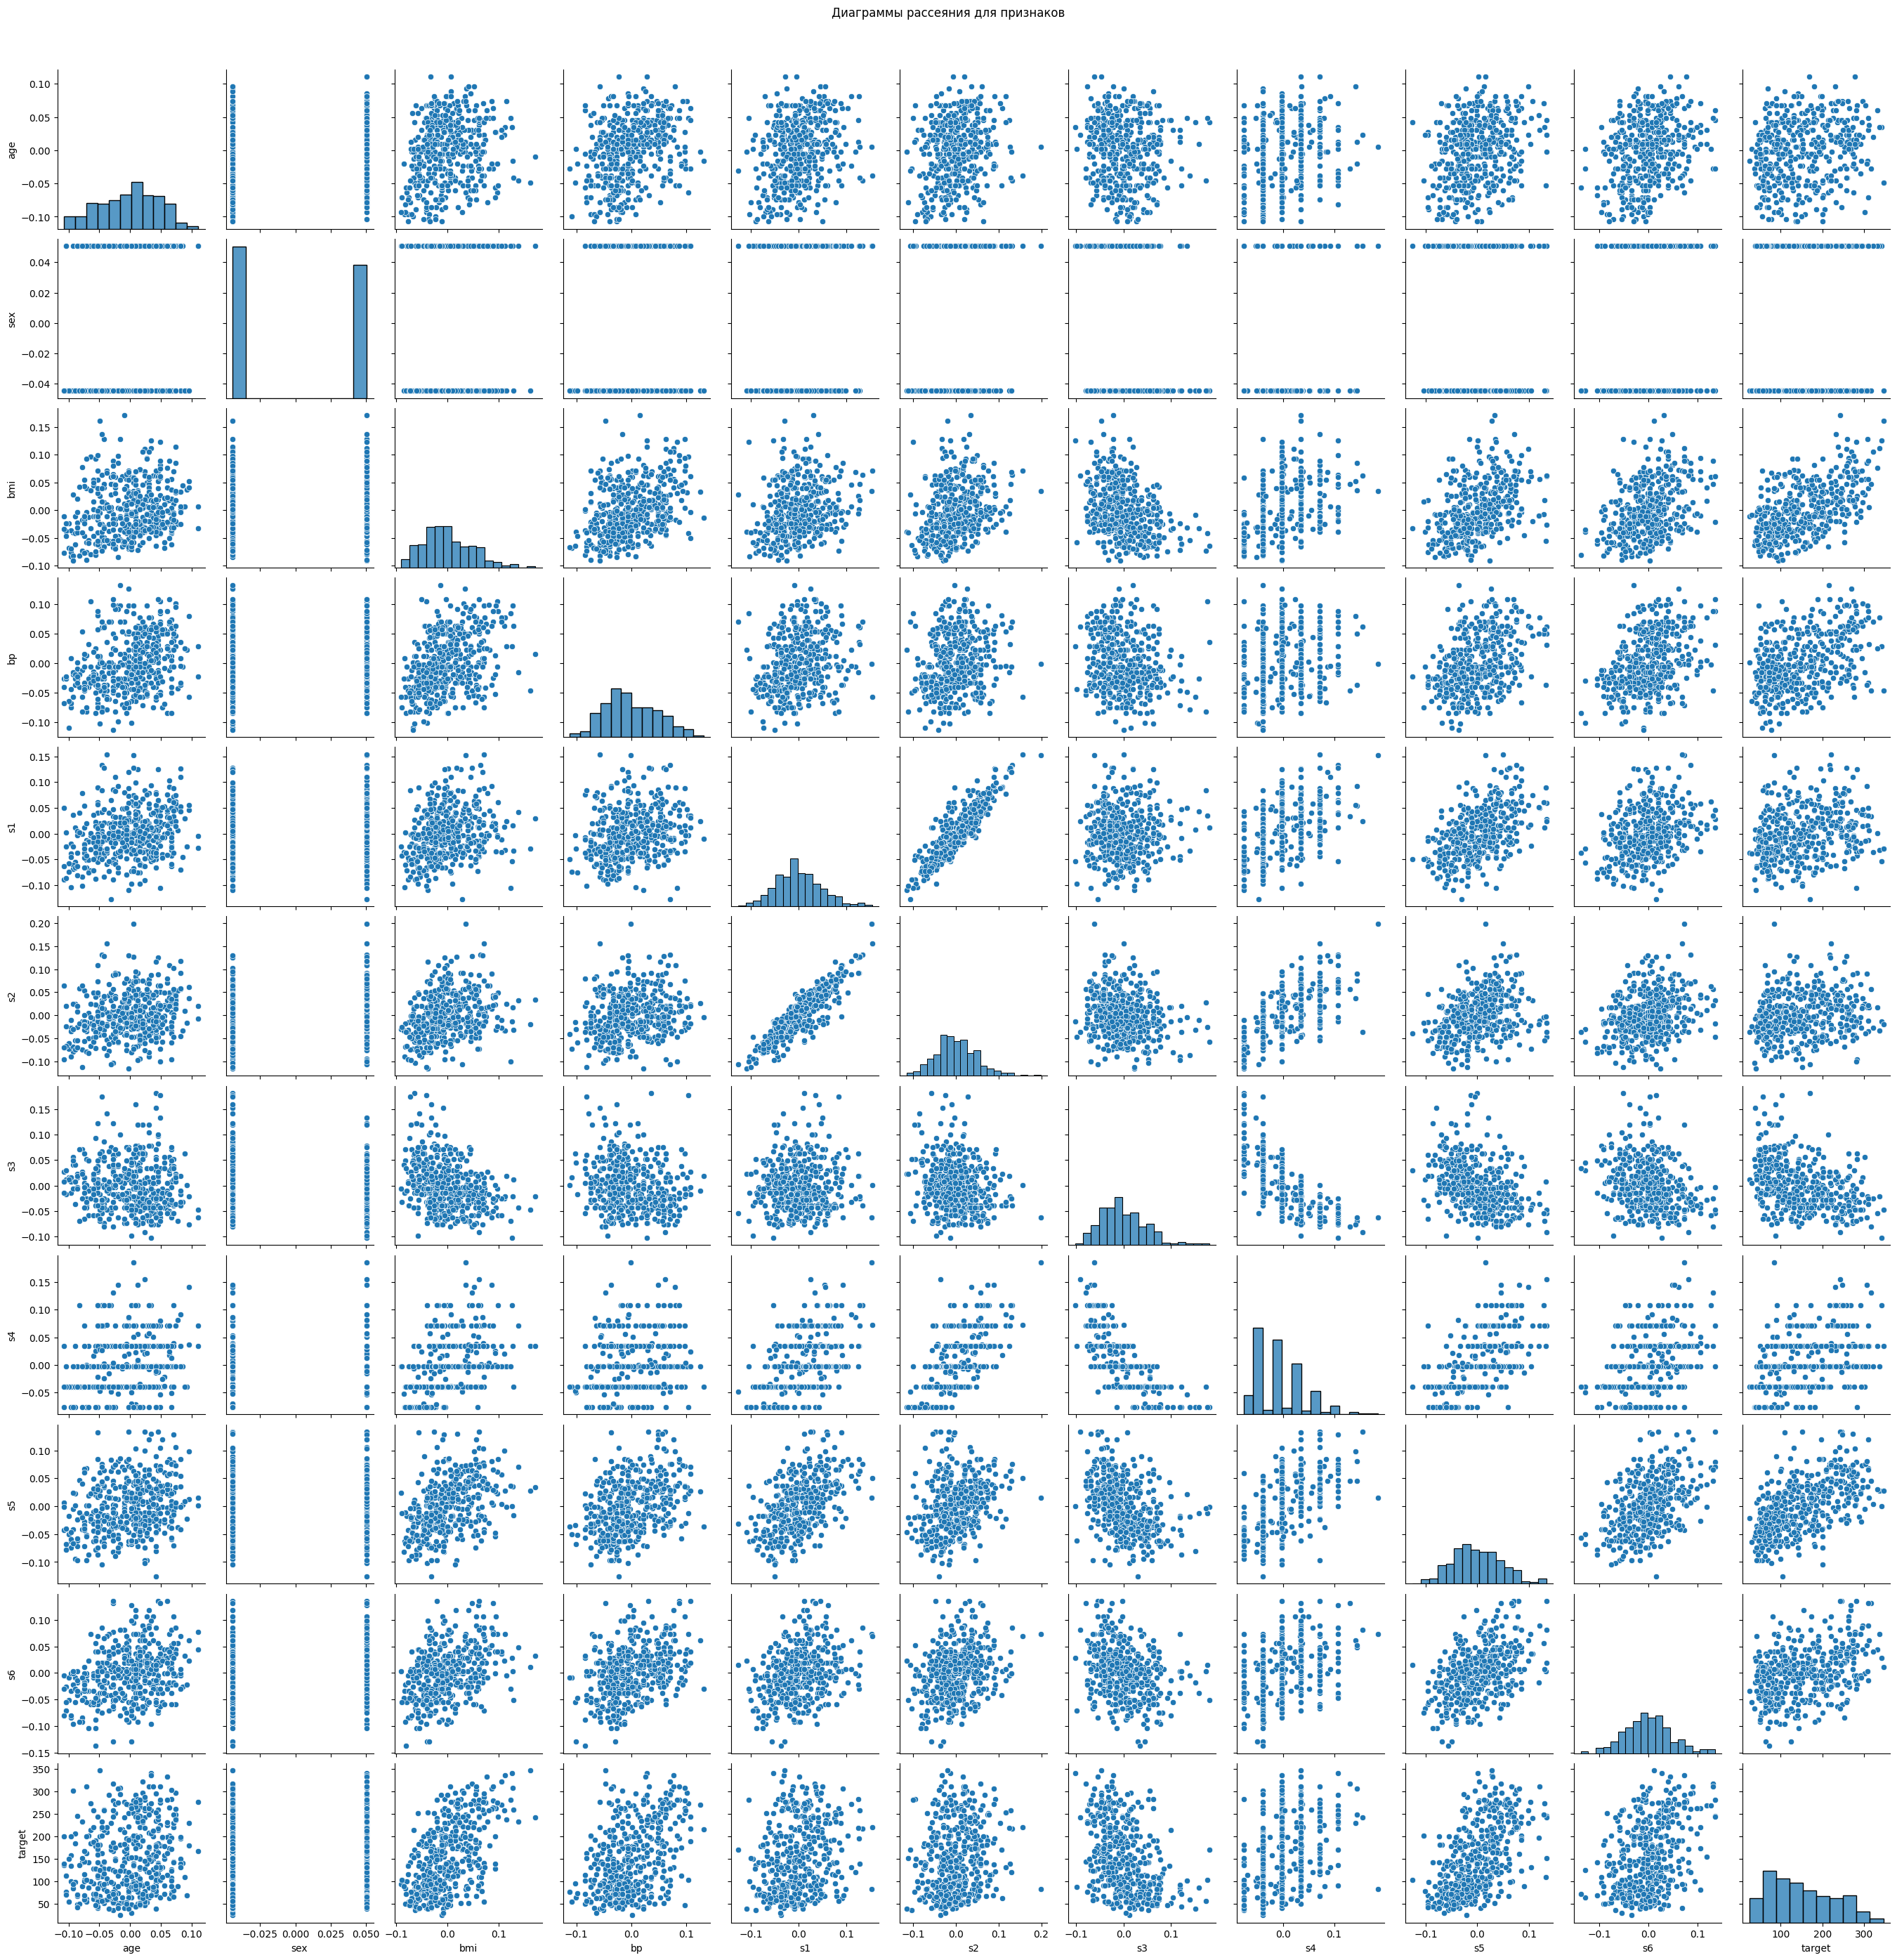

In [ ]:
sns.pairplot(df)
plt.suptitle("Диаграммы рассеяния для признаков", y=1.02)
plt.show()

Также рассмотрим корреляционную матрицу признаков

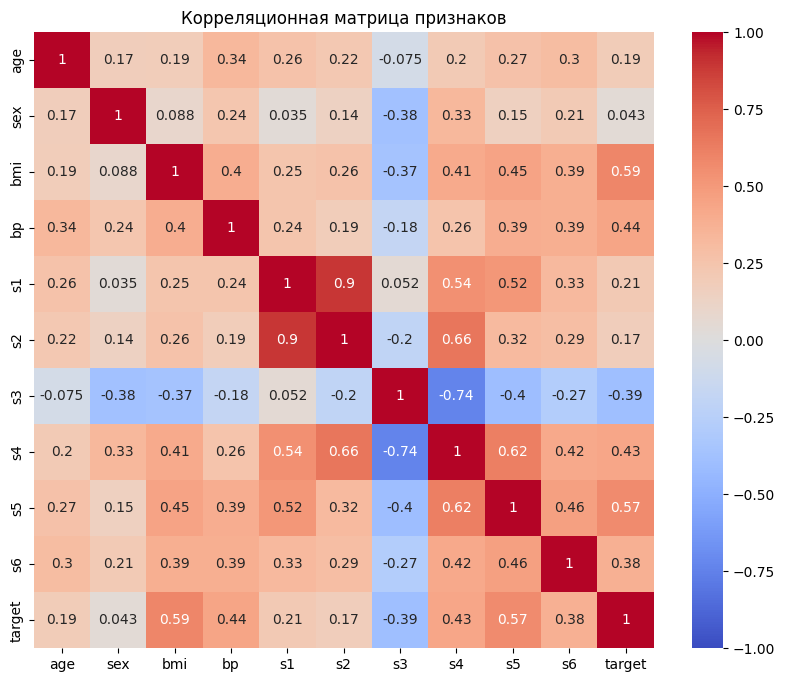

In [ ]:
matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица признаков")
plt.show()

Большинство корреляций между признаками слабые. Это может  усложнить задачу для некоторых моделей машинного обучения.

### 1.6 Выводы


Визуальный анализ показал, что данные относительно чисты, но могут потребовать минимальной обработки, такой как устранение выбросов.

Низкие корреляции между признаками предполагают, что для успешного моделирования могут потребоваться методы, способные улавливать сложные, нелинейные зависимости, такие как нелинейные модели (например, деревья решений)

На данном этапе не выявлено точных зависимостей между входными признаками и выходным параметром.

---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [ ]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Количество выбросов, устраненных по методу IQR: {len(df) - len(df_no_outliers)}")
df = df_no_outliers

Количество выбросов, устраненных по методу IQR: 31


In [ ]:
missing_values = df_no_outliers.isnull().sum()

print("Количество пропущенных значений в каждом столбце после очистки:")
print(missing_values)

Количество пропущенных значений в каждом столбце после очистки:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0


### 2.2 Разбиение данных на обучающую и тестовую выборки


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Размер обучающей выборки: {X_train.shape[0]} образцов')
print(f'Размер тестовой выборки: {X_test.shape[0]} образцов')

Размер обучающей выборки: 287 образцов
Размер тестовой выборки: 124 образцов


### 2.3 Преобразование данных

Для успешного моделирования и повышения производительности моделей необходимо правильно обработать входные и выходные переменные. Одним из наиболее распрастроненных способов является стандартизация, то есть преобразование данных таким образом, чтобы признаки имели нулевое среднее значение и единичное стандартное отклонение. Стандартизация ускоряет процесс сходимости алгоритмов оптимизации и улучшает качество модели. Однако данные из библиотеки Sklearn.datasets уже были стандартизированны. На данном этапе у нас нет необходимости проводить дополнительные преобразования.

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


Наша цель - прогнозирование прогрессирования диабета на основе медицинских показателей пациентов. Это задача регрессии, так как целевая переменная (target) является числовой и непрерывной. Для первого этапа обучения можно использовать модель "Ridge Regression", так как простая и эффективная модель может подойти для начального анализа перед использованием более сложных моделей, но вероятно даст более качественный результат чем Линейная Регрессия.

In [ ]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

y_test_pred = ridge_model.predict(X_test)

### 3.2 Оценка качества модели


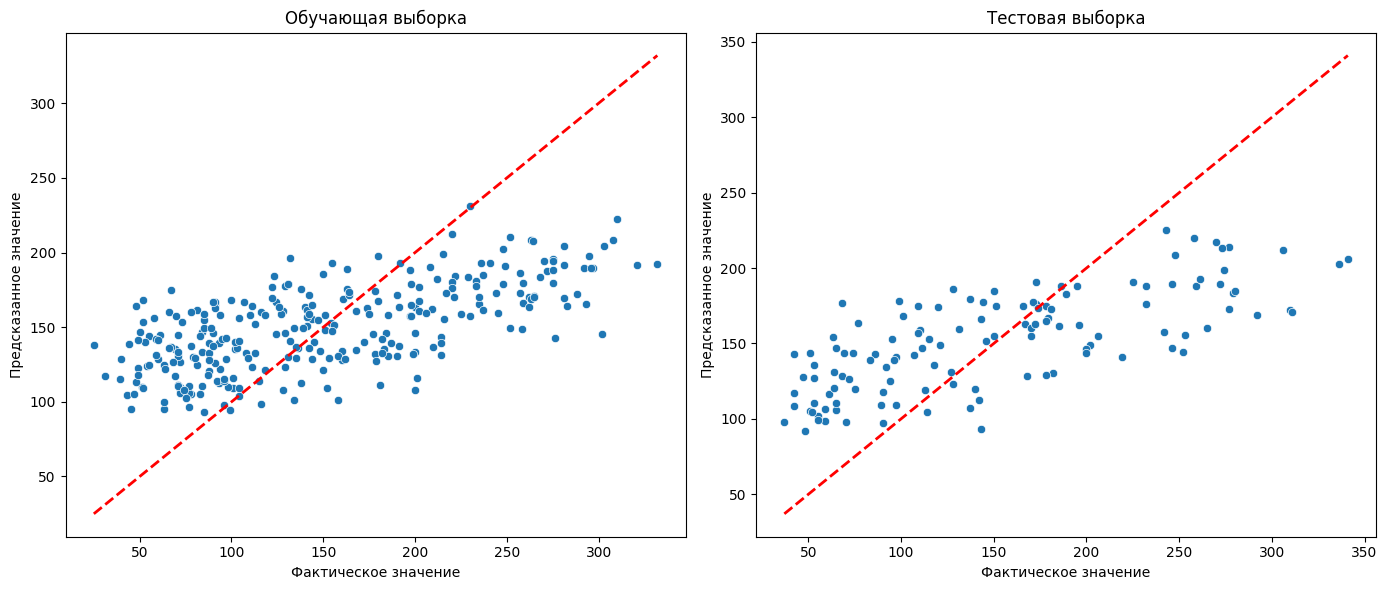

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Обучающая выборка')
plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)

plt.title('Тестовая выборка')
plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.tight_layout()
plt.show()

Расчитаем коэффициенты детерминации

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Коэффициент детерминации (R^2) на обучающей выборке: {r2_train}")
print(f"Коэффициент детерминации (R^2) на тестовой выборке: {r2_test}")

Коэффициент детерминации (R^2) на обучающей выборке: 0.3556891179885264
Коэффициент детерминации (R^2) на тестовой выборке: 0.4280924345277949


Построим диаграммы ошибок

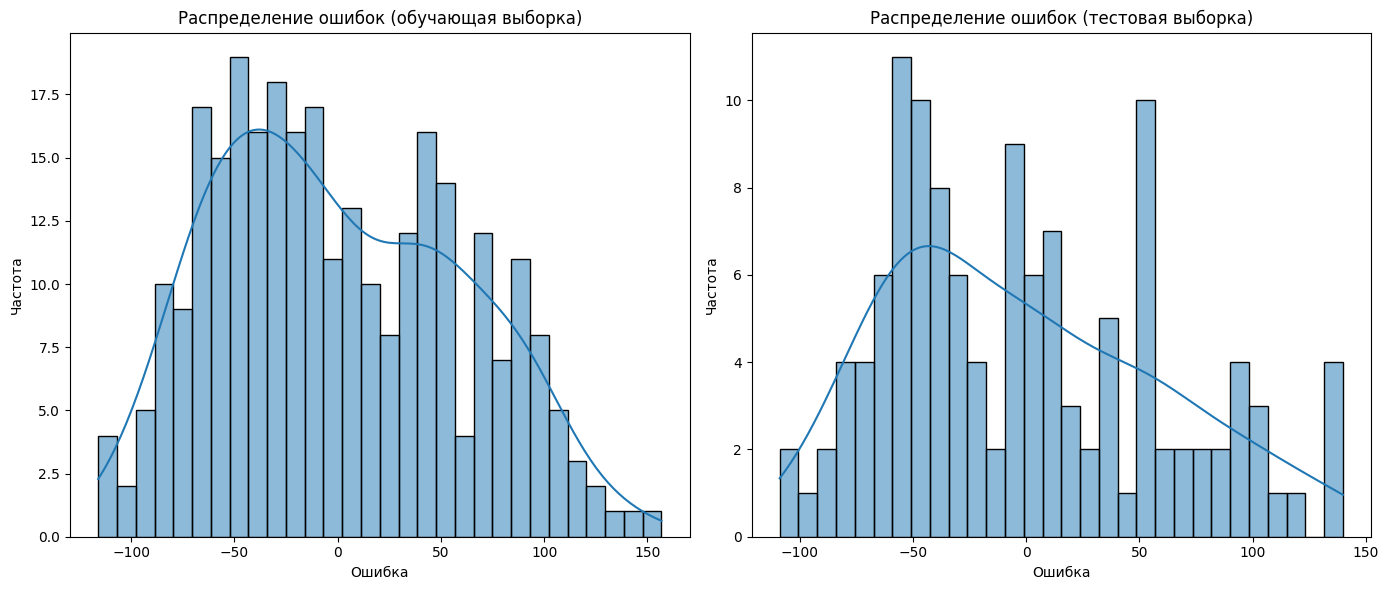

In [ ]:
errors_train = y_train - y_train_pred
errors_test = y_test - y_test_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(errors_train, bins=30, kde=True)
plt.title('Распределение ошибок (обучающая выборка)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(errors_test, bins=30, kde=True)
plt.title('Распределение ошибок (тестовая выборка)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Можно увидеть, что и диаграммы рассеяния и диаграммы ошибок модели, показывают, что моделирование достаточно сильно расходится с реальными данными. Коэффициенты детерминации также дают понять, что модель на данном этапе не справляется с заданной задачей.

### 3.3 Исследование модели и алгоритма обучения


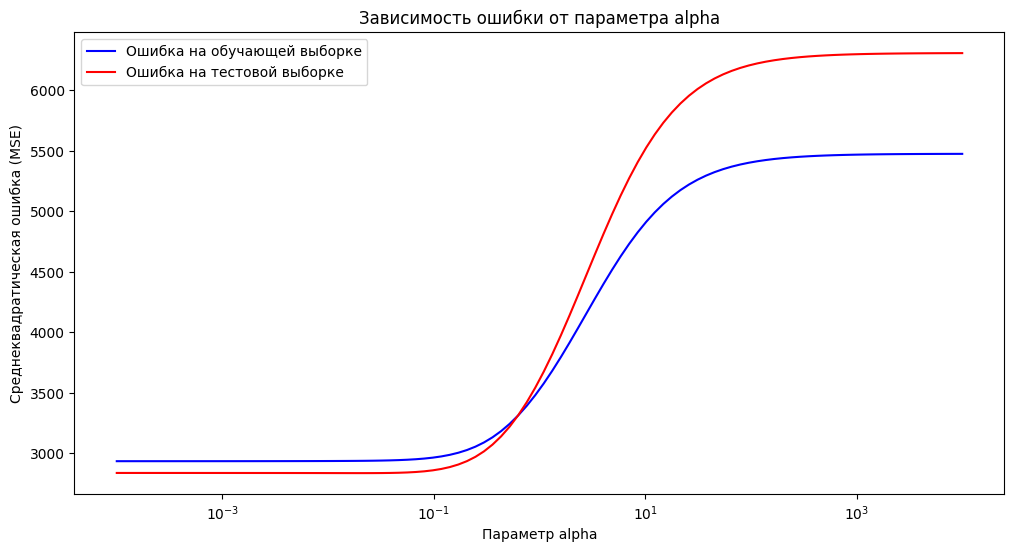

In [ ]:
alphas = np.logspace(-4, 4, 100)
train_errors = []
test_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)


    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))


plt.figure(figsize=(12, 6))

plt.plot(alphas, train_errors, label='Ошибка на обучающей выборке', color='blue')
plt.plot(alphas, test_errors, label='Ошибка на тестовой выборке', color='red')
plt.xscale('log')
plt.xlabel('Параметр alpha')
plt.ylabel('Среднеквадратическая ошибка (MSE)')
plt.title('Зависимость ошибки от параметра alpha')
plt.legend()
plt.show()

Обучение модели с лучший параметром alpha

In [ ]:
best_alpha = alphas[np.argmin(test_errors)]

print (f'Лучший гиперпараметр alpha: {best_alpha}')

Лучший гиперпараметр alpha: 0.022051307399030457


In [ ]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Коэффициент детерминации (R^2) на обучающей выборке: {r2_train:.2f}')

Коэффициент детерминации (R^2) на обучающей выборке: 0.46


Альтернативный метод поиска лучшего alpha используя метод GridSearchCV

In [ ]:
param_grid = {'alpha': np.logspace(-4, 4, 100)}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f'Лучший гиперпараметр alpha: {best_alpha}')

Лучший гиперпараметр alpha: 0.055908101825122285


In [ ]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Коэффициент детерминации (R^2) на обучающей выборке: {r2_train:.2f}')

Коэффициент детерминации (R^2) на обучающей выборке: 0.46


Видно, что при использовании оптимального параметра модель "Ridge Regression" способна дать более качественное предсказание.

### 3.4 Улучшение решения


На втором этапе анализа с помощью методов машинного обучения уже можно применить модель которая лучше подходит для данных с плохой корреляцией между признаками и способной к построению сложных нелинейных зависимостей. Такой моделью может выступить "Random Forest Regressor".

In [ ]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Проведем оценку качества модели приведенными выше способами. Построим диаграмму рассеяния

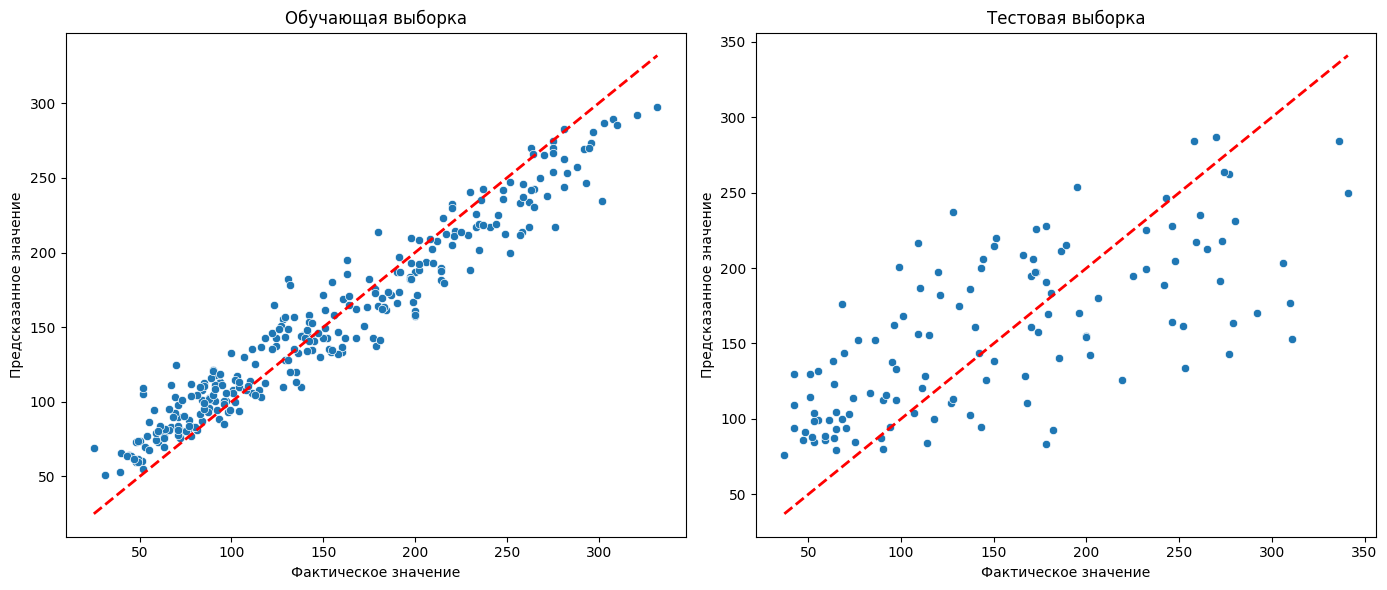

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Обучающая выборка')
plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)

plt.title('Тестовая выборка')
plt.xlabel('Фактическое значение')
plt.ylabel('Предсказанное значение')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.tight_layout()
plt.show()

Расчет коэффициентов детерминации

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Коэффициент детерминации (R^2) на обучающей выборке: {r2_train}")
print(f"Коэффициент детерминации (R^2) на тестовой выборке: {r2_test}")

Коэффициент детерминации (R^2) на обучающей выборке: 0.9151208031317491
Коэффициент детерминации (R^2) на тестовой выборке: 0.4776344141658888


Построение гистограмм распределения ошибок модели

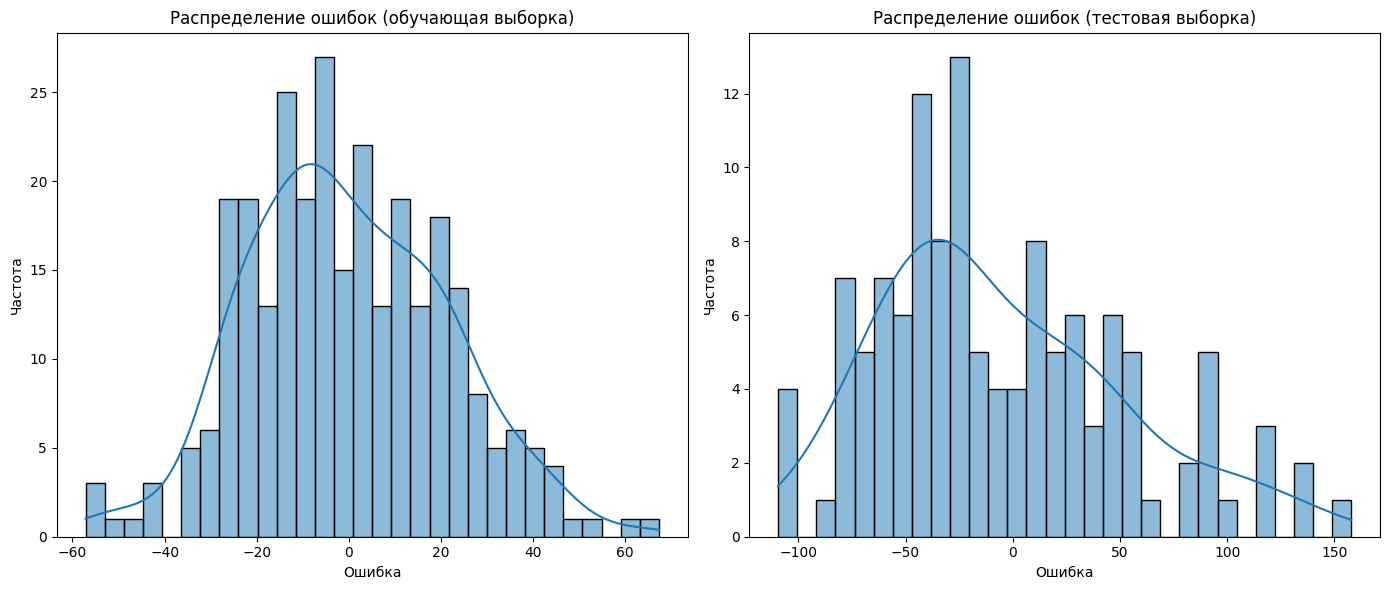

In [ ]:
errors_train = y_train - y_train_pred
errors_test = y_test - y_test_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(errors_train, bins=30, kde=True)
plt.title('Распределение ошибок (обучающая выборка)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(errors_test, bins=30, kde=True)
plt.title('Распределение ошибок (тестовая выборка)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Можно увидеть, что модель "Random Forest" действительно лучше справляется с прогнозирование результатов для данного датасета.

Теперь получим оптимальные параметры модели. Изучим зависимость 4 основных параметров "Random Forest": n_estimators( количество деревьев в лесу), max_depth(максимальная глубина дерева), min_samples_split(минимальное количество выборок, необходимое для разделения узла), min_samples_leaf(минимальное количество выборок, необходимое для образования листа) от ошибки модели.

<Figure size 1400x400 with 0 Axes>

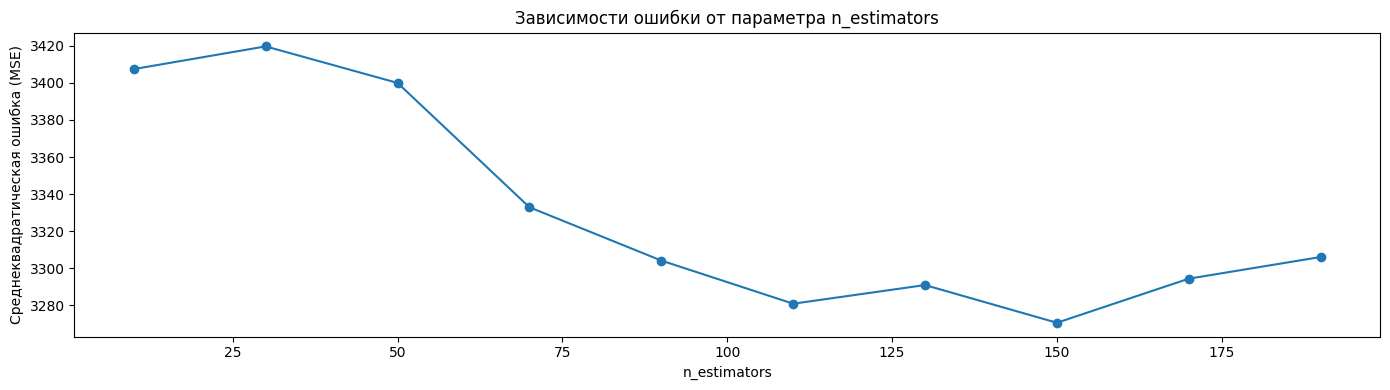

In [ ]:
plt.figure(figsize=(14, 4))

n_estimators_range = range(10, 210, 20)
mse_estimators = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_estimators.append(mse)

plt.figure(figsize=(14, 4))

plt.plot(n_estimators_range, mse_estimators, marker='o')
plt.title('Зависимости ошибки от параметра n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Среднеквадратическая ошибка (MSE)')

plt.tight_layout()
plt.show()

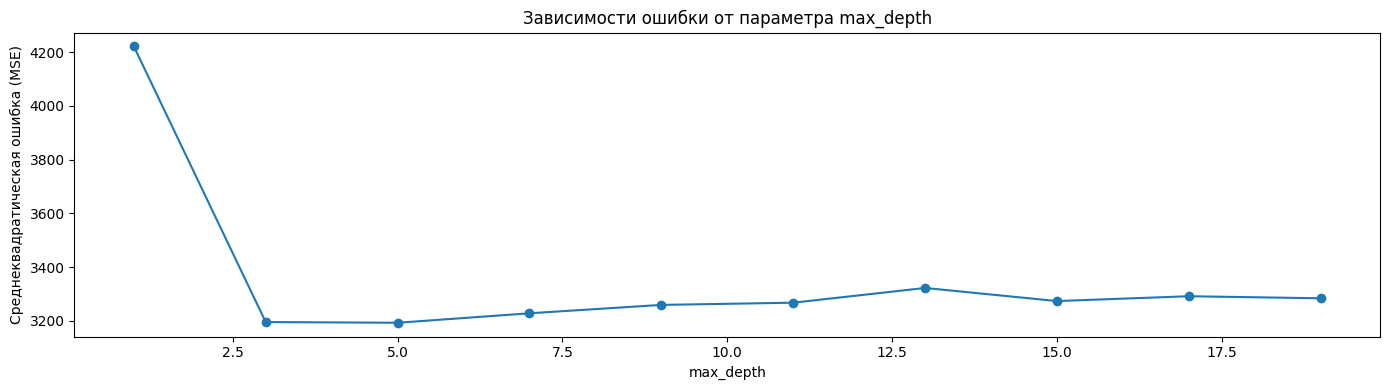

In [ ]:
plt.figure(figsize=(14, 4))

max_depth_range = range(1, 21, 2)
mse_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_depth.append(mse)


plt.plot(max_depth_range, mse_depth, marker='o')
plt.title('Зависимости ошибки от параметра max_depth')
plt.xlabel('max_depth')
plt.ylabel('Среднеквадратическая ошибка (MSE)')

plt.tight_layout()
plt.show()

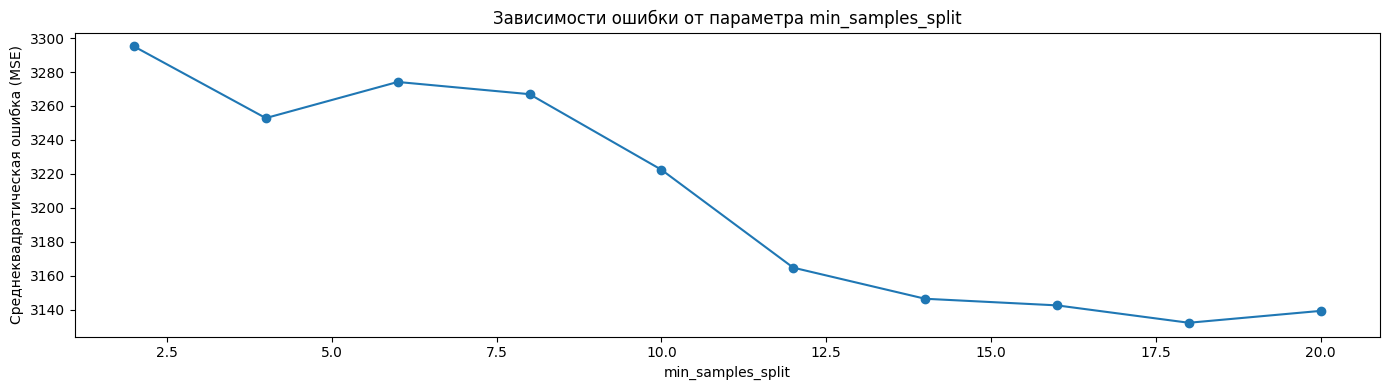

In [ ]:
plt.figure(figsize=(14, 4))

min_samples_split_range = range(2, 22, 2)
mse_split = []

for split in min_samples_split_range:
    model = RandomForestRegressor(n_estimators=100, min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_split.append(mse)



plt.plot(min_samples_split_range, mse_split, marker='o')
plt.title('Зависимости ошибки от параметра min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Среднеквадратическая ошибка (MSE)')

plt.tight_layout()
plt.show()

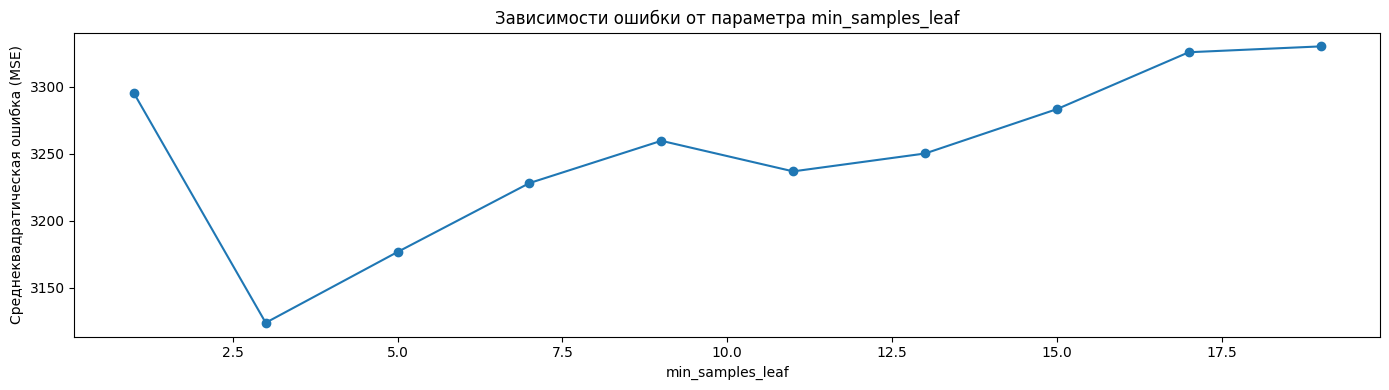

In [ ]:
plt.figure(figsize=(14, 4))

min_samples_leaf_range = range(1, 21, 2)
mse_leaf = []

for leaf in min_samples_leaf_range:
    model = RandomForestRegressor(n_estimators=100, min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_leaf.append(mse)


plt.plot(min_samples_leaf_range, mse_leaf, marker='o')
plt.title('Зависимости ошибки от параметра min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Среднеквадратическая ошибка (MSE)')

plt.tight_layout()
plt.show()

Используя метод GridSearchCV получим оптимальные параметры модели

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


И обучим модель используя полученные параметры

In [ ]:
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 (Train Set): {r2_train}")
print(f"R^2 (Test Set): {r2_test}")

R^2 (Train Set): 0.7548724362410919
R^2 (Test Set): 0.5133219214849204


### 3.5 Выводы


В рамках работы был изучен датасет пациентов с диабетом. Были рассмотрены свойства признаков датасета и оценены корреляции между ними. Были построены две модели машинного обучения для решения задачи, предсказания прогрессирования диабета на основе медицинский данных пациента. В результате наиболее качественный результат дала модель "Random Forest Regressor", что было ожидаемо, с учетом низкой корреляции между признаками в датасете. Модель имеет достаточно низкий Коэффициент детерминации (R^2) с значением близким к <0.5>, что делает модель недостаточно точной для качественного прогнозирования. Вероятно низкая эффективность модели может быть связанно с малой выборкой данных, а также с тем, что параметр регресии в отличии от других датасетов, включающих пациентов с диабетом, является вещественной (а не бинарной), а также обладает достаточно большим разбросом по значениям, из-за чего при прогнозировании сильно возрастает ошибка.